## eigh - Hermit's matrix

In [18]:
"""
numpy.linalg.eigh - Return the eigenvalues and eigenvectors of a complex Hermitian (conjugate symmetric) or a real symmetric matrix.
Returns two objects, a 1-D array containing the eigenvalues of a, 
and a 2-D square array or matrix (depending on the input type) of the corresponding eigenvectors (in columns).
"""
import numpy as np
from numpy import linalg as LA
a = np.array([[1, -2j], [2j, 5]])
w, v = LA.eigh(a)
print("eigenvalues:")
print(w)
print("eigenvectors:")
print(v)

eigenvalues:
[0.17157288 5.82842712]
eigenvectors:
[[-0.92387953+0.j         -0.38268343+0.j        ]
 [ 0.        +0.38268343j  0.        -0.92387953j]]


In [19]:
# If we do not tell it that the matrix is Hermitian, 
# we expect the same results, but less precisely, and slower. 
w, v = LA.eig(a)
print("eigenvalues:")
print(w)
print("eigenvectors:")
print(v)
# Now it gave the imaginary part for both eigenvalues. 

eigenvalues:
[0.17157288+0.j 5.82842712+0.j]
eigenvectors:
[[ 0.92387953+0.j         -0.        -0.38268343j]
 [-0.        -0.38268343j  0.92387953+0.j        ]]


## characteristic polynomial

In [20]:
"""
 charpoly(x='lambda', simplify=<function simplify>)

    Computes characteristic polynomial det(x*I - M) where I is the identity matrix.
    A PurePoly is returned, so using different variables for x does not affect the comparison or the polynomials:
"""
from sympy import Matrix
from sympy.abc import x, y

Mnp = np.array([[1., 3], [2, 0]])
M = Matrix(Mnp)
M.charpoly()

PurePoly(1.0*lambda**2 - 1.0*lambda - 6.0, lambda, domain='RR')

In [21]:
coefs = np.poly(Mnp)


In [22]:
import numpy.polynomial.polynomial as poly
poly.polyroots(coefs[::-1])


array([-2.,  3.])

isreal = [ True  True]
realRoots = [-2.  3.]
[-2.  3.]
[-2.  3.]
[ 1. -1. -6.]


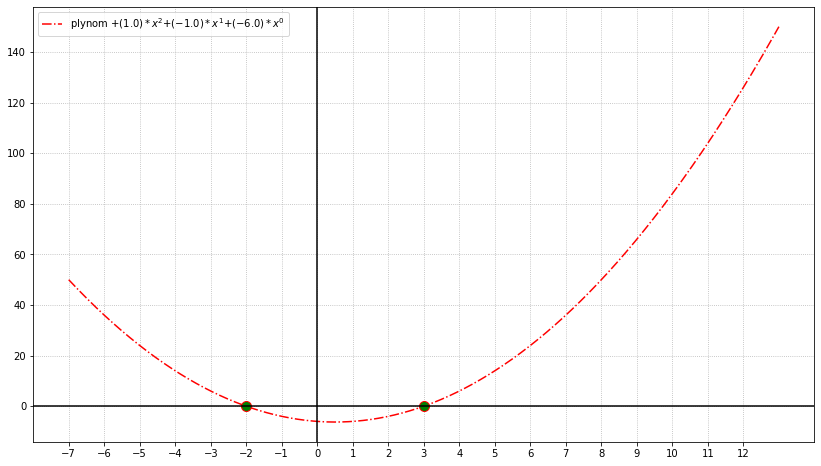

In [23]:
import matplotlib.pyplot as plt

def plot_polynom(coeficients: np.ndarray):
    roots = poly.polyroots(coeficients[::-1])
    isreal = np.isreal(roots)
    print("isreal =", isreal)     
    realRoots = roots[isreal].real     
    print("realRoots =", realRoots)   
    print(poly.polyroots(coeficients[::-1]))
    print(roots)
        
    start = np.min(realRoots) - 5
    stop = np.max(realRoots) + 10

    x = np.linspace(start, stop, 1000)
    fig = plt.figure(figsize = (14, 8))
    print(coeficients)
    y = 0
    ys = ""
    for it in range(0, len(coeficients)):
        ys += f"$+({(coeficients[it])})" + "*x^" + f"{len(coeficients) - it - 1}$"
        y += (coeficients[it])*x**(len(coeficients) - it - 1)

    plt.plot(x, y, 'r-.', label =f'plynom {ys}')

    for realRoot in realRoots:
        # draw a point
        plt.plot(realRoot, 0, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
    
    plt.axhline(y=0, color='k', linestyle='-')
    plt.axvline(x=0, color='k', linestyle='-')
    plt.xticks(range(int(np.ceil(start)), int(np.ceil(stop))))
    plt.legend()
    plt.grid(True, linestyle =':')
    plt.show()

plot_polynom(coefs)    

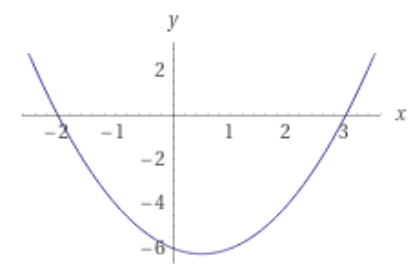

In [24]:
# Pre-defined symbols
x, y

(x, y)

In [25]:
M.charpoly(x), M.charpoly(y)

(PurePoly(1.0*x**2 - 1.0*x - 6.0, x, domain='RR'),
 PurePoly(1.0*y**2 - 1.0*y - 6.0, y, domain='RR'))

In [26]:
M.charpoly(x) == M.charpoly(y)

True

## Eigendecomposition

In [27]:
from matplotlib import pyplot as plt
A = np.array([[-1, 3], [2, -2]])
v = np.array([[2], [1]])

In [28]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver(x[0],
                   x[1],
                   x[2],
                   x[3],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)
        
    plt.grid()


We can now use this function to plot our vector v:

(-1.0, 4.0)

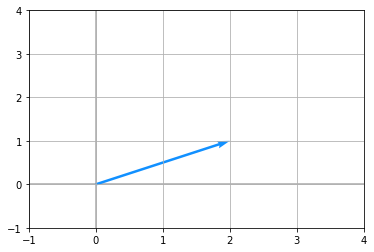

In [29]:
plotVectors([v.flatten()], cols=['#1190FF'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)


Now, let’s apply the matrix A to this vector. We’ll plot the old vector v (light blue) and the new one (orange):

[[1]
 [2]]


(-1.0, 4.0)

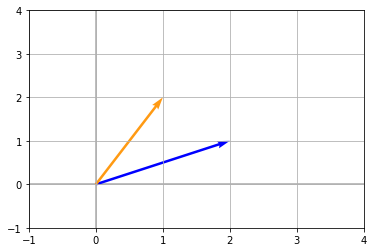

In [30]:
Av = A.dot(v)
print(Av)
# plotVectors([v.flatten(), Av.flatten()], cols=['#1190FF', '#FF9A13'])
plotVectors([v.flatten(), Av.flatten()], cols=['blue', '#FF9A13'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)


## Find eigenvalues and eigenvectors in Python

In [31]:
A = np.array([[5, 1], [3, 3]])
np.linalg.eig(A)


(array([6., 2.]), array([[ 0.70710678, -0.31622777],
        [ 0.70710678,  0.9486833 ]]))

(-1.0, 3.0)

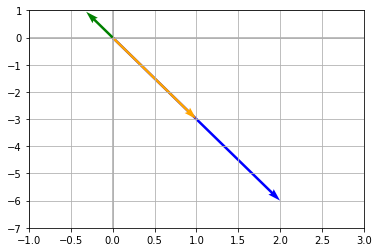

In [32]:
v = np.array([[1], [-3]])
Av = A.dot(v)
v_np = [-0.31622777, 0.9486833]

plotVectors([Av.flatten(), v.flatten(), v_np], cols=['blue', 'orange', 'green'])
plt.ylim(-7, 1)
plt.xlim(-1, 3)

We can see that the vector found with Numpy (in dark blue) is a scaled version of our preceding [1 −3].

## Compute Jordan normal form of matrix in Python

In [33]:
"""
source - https://docs.sympy.org/latest/modules/matrices/matrices.html
jordan_form(calc_transform=True, **kwargs)[source]
    Return (P,J)
where J is a Jordan block matrix and P is a matrix such that M=PJP−1
"""
from sympy import Matrix
a = np.array([[5, 4, 2, 1], 
              [0, 1, -1, -1], 
              [-1, -1, 3, 0], 
              [1, 1, -1, 2]])
m = Matrix(a)

P, J = m.jordan_form()
print("Jordan block matrix")
J

Jordan block matrix


Matrix([
[1, 0, 0, 0],
[0, 2, 0, 0],
[0, 0, 4, 1],
[0, 0, 0, 4]])

In [34]:
P

Matrix([
[-1,  1,  1, 1],
[ 1, -1,  0, 0],
[ 0,  0, -1, 0],
[ 0,  1,  1, 0]])